<a href="https://colab.research.google.com/github/programminghistorian/jekyll/blob/gh-pages/assets/computer-vision-deep-learning-pt1/computer-vision-deep-learning-pt1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/davanstrien/Computer-Vision-for-the-Humanities-an-introduction-to-deep-learning-for-image-classification/blob/main/ph_computer_vision_tutorial_part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cells below set up the data to mirror the format found on Kaggle, which is where this notebook was originally written. If you are running the notebook on your own machine or server, you will probably want a different directory structure (note that we can't provide support for this approach to running the lesson material).

In [ ]:
%%capture
!mkdir ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/ -p
!wget https://zenodo.org/record/5838410/files/ads_upsampled.csv?download=1 -O ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/ads_upsampled.csv
!mkdir ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/images/ -p
!wget -O images.zip https://zenodo.org/record/5838410/files/images.zip?download=1
!unzip images.zip -d ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/images/
!mkdir ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/ -p
!wget https://zenodo.org/record/4487141/files/multi_label.csv?download=1 -O ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/multi_label.csv
!wget -O photo_images.zip https://zenodo.org/record/4487141/files/images.zip?download=1
!mkdir ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images -p
!unzip photo_images -d ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images

In [ ]:
!pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 13.6 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.7
    Uninstalling fastai-2.7.7:
      Successfully uninstalled fastai-2.7.7


# Computer Vision for the Humanities: an Introduction to Deep Learning for Image Classification

This notebook contains the code you'll need to run in both Part 1 and Part 2 of this lesson.

# Part 1

## Creating an Image Classifier in fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Loading the Data


In [ ]:
ad_data = ImageDataLoaders.from_csv(
    path="../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/",  # root path to csv file and image directory
    csv_fname="ads_upsampled.csv",  # the name of our csv file
    folder="images/",  # the folder where our images are stored
    fn_col="file",  # the file column in our csv
    label_col="label",  # the label column in our csv
    item_tfms=Resize(224, ResizeMethod.Squish),  # resize imagesby squishing so they are 224x224 pixels
    seed=42,  # set a fixed seed to make results more reproducible
)

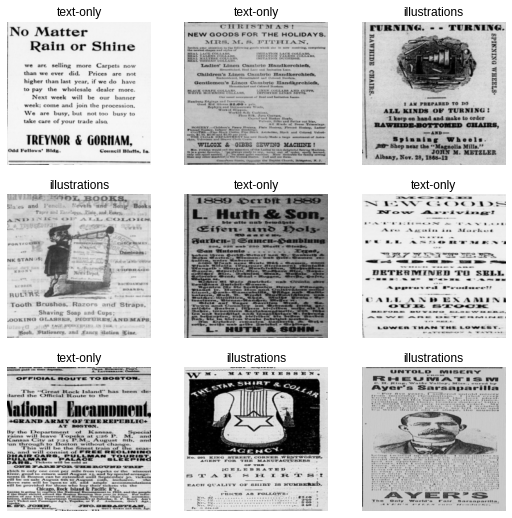

In [ ]:
ad_data.show_batch()

### Creating the Model



In [ ]:
learn = vision_learner(
    ad_data,  # the data the model will be trained on
    resnet18,  # the type of model we want to use
    metrics=accuracy,  # the metrics to track
)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Training the Model

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.030679,0.365948,0.780000,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.363320,0.339166,0.860000,00:07
1,0.237191,0.350419,0.900000,00:07
2,0.160168,0.354306,0.906667,00:07
3,0.112358,0.203155,0.913333,00:07
4,0.083902,0.101984,0.953333,00:07


## Appendix: A Non-Scientific Experiment Assessing Transfer Learning

In [ ]:
learn_random_start = vision_learner(ad_data, resnet18, metrics=accuracy, pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
learn_random_start.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.208555,0.704347,0.620000,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.810056,0.966800,0.540000,00:11
1,0.603963,1.150676,0.580000,00:08
2,0.448712,0.428689,0.846667,00:08
3,0.343541,0.251846,0.920000,00:08
4,0.263272,0.215473,0.920000,00:10


In [ ]:
learn.validate()

(#2) [0.1019839495420456,0.95333331823349]

# PART 2



## Looking More Closely at the Data

In [ ]:
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/multi_label.csv', na_filter=False)

In [ ]:
df

,download_image_path,label
0,in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg,human
1,dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg,human
2,curiv_joshuaTree_ver01_data_sn85066387_00175037858_1899062601_0564_009_0_90.jpg,human|landscape
3,curiv_fiddleneck_ver01_data_sn85066408_00271767213_1916051601_0139_006_0_97.jpg,human
4,me_aroostook_ver01_data_sn84022374_00332895473_1900112801_0384_000_0_96.jpg,human
...,...,...
1995,khi_corbett_ver01_data_sn82016014_00295870278_1914100801_0408_002_0_98.jpg,animal
1996,kyu_casablanca_ver01_data_sn86069457_00206533262_1895061301_0798_004_0_92.jpg,human
1997,idhi_angkor_ver01_data_sn86091084_00279550845_1906033101_0372_000_0_92.jpg,human
1998,txdn_infiniti_ver03_data_sn88083938_00200294269_1897010501_1290_000_0_99.jpg,human-structure


In [ ]:
df['label'].value_counts()

human                                     1371
human-structure                            142
human|human-structure                      104
landscape                                   83
                                            80
human-structure|landscape                   69
human|landscape                             48
human|human-structure|landscape             28
human|animal                                24
animal                                      20
human|animal|landscape                      11
human|animal|human-structure                 9
animal|human-structure                       4
human|animal|human-structure|landscape       3
animal|landscape                             3
animal|human-structure|landscape             1
Name: label, dtype: int64

In [ ]:
# create a variable lables to store the list
labels = df['label'].to_list()
# take a slice of this list to display
labels[:6]

['human', 'human', 'human|landscape', 'human', 'human', 'human']

In [ ]:
# for each label in the list split on "|"
split_labels = [label.split("|") for label in labels]

In [ ]:
split_labels[:4]

[['human'], ['human'], ['human', 'landscape'], ['human']]

In [ ]:
labels = [label for sublist in split_labels for label in sublist]
labels[:4]

['human', 'human', 'human', 'landscape']

### Counting the Labels



In [ ]:
from collections import Counter
label_freqs = Counter(labels)

In [ ]:
label_freqs

Counter({'': 80,
         'animal': 75,
         'human': 1598,
         'human-structure': 360,
         'landscape': 246})

In [ ]:
sum(label_freqs.values())

2359

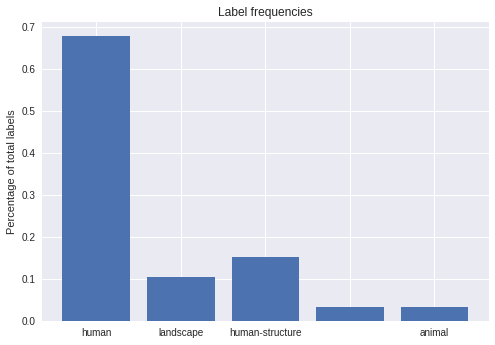

In [ ]:
import matplotlib.pyplot as plt

plt.bar(
    label_freqs.keys(),  #pass in our labels
    list(map(lambda x: x / sum(label_freqs.values()), label_freqs.values())),  # normalized values
)
# add a title to the plot
plt.title("Label frequencies")
# add a y axis label
plt.ylabel("Percentage of total labels")
plt.show()  # show the plot

## Loading Data


In [ ]:
from fastai.vision.all import *

In [ ]:
df.columns

Index(['download_image_path', 'label'], dtype='object')

In [ ]:
photo_data = ImageDataLoaders.from_df(
    df,  # the dataframe where our labels and image file paths are stored
    folder="../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images",  # the path to the directory holding the images
    bs=32,  # the batch size (number of images + labels)
    label_delim="|",  # the deliminator between each label in our label column
    item_tfms=Resize(224),  # resize each image to 224x224
    valid_pct=0.3,  # use 30% of the data as validation data
    seed=42  # set a seed to make results more reproducible
)

### fastai DataLoaders


In [ ]:
photo_data

## Viewing our Data

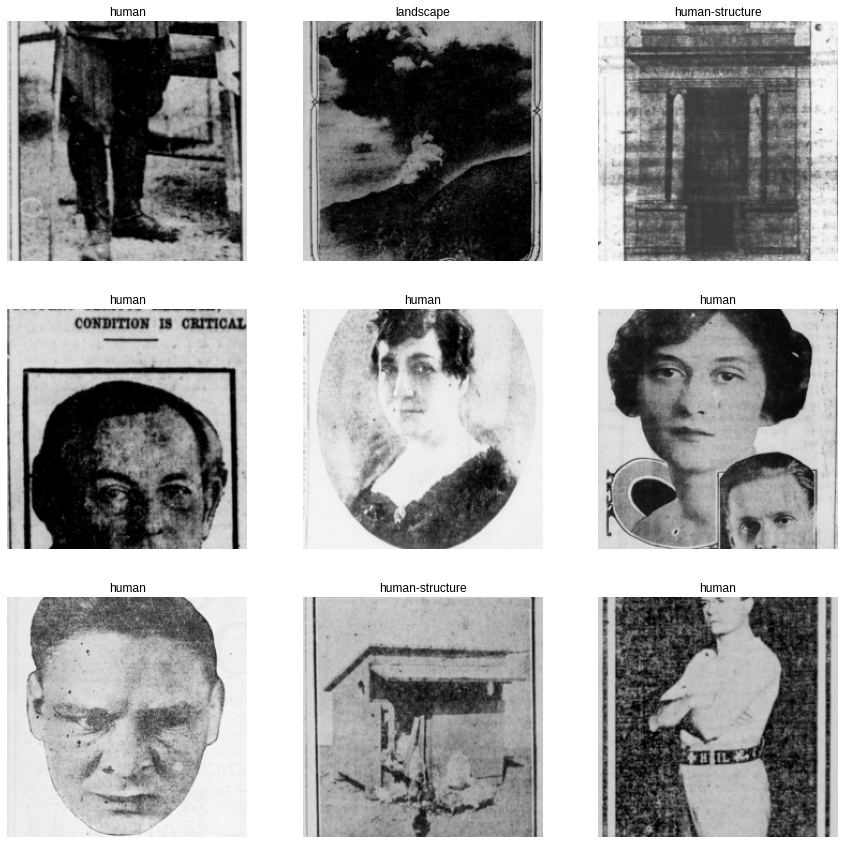

In [ ]:
photo_data.show_batch(figsize=(15,15))

### Inspecting Model Inputs

In [ ]:
photo_data.vocab

['animal', 'human', 'human-structure', 'landscape']

In [ ]:
x, y = photo_data.one_batch()

In [ ]:
type(x), type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorMultiCategory)

In [ ]:
len(x), len(y)

(32, 32)

In [ ]:
x[0]

TensorImage([[[0.8471, 0.8431, 0.8275,  ..., 0.8510, 0.8549, 0.8627],
              [0.8353, 0.8353, 0.8235,  ..., 0.8510, 0.8549, 0.8549],
              [0.8353, 0.8275, 0.7882,  ..., 0.8471, 0.8510, 0.8549],
              ...,
              [0.9176, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098],
              [0.9216, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098],
              [0.9216, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098]],

             [[0.8471, 0.8431, 0.8275,  ..., 0.8510, 0.8549, 0.8627],
              [0.8353, 0.8353, 0.8235,  ..., 0.8510, 0.8549, 0.8549],
              [0.8353, 0.8275, 0.7882,  ..., 0.8471, 0.8510, 0.8549],
              ...,
              [0.9176, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098],
              [0.9216, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098],
              [0.9216, 0.9216, 0.9176,  ..., 0.9098, 0.9098, 0.9098]],

             [[0.8471, 0.8431, 0.8275,  ..., 0.8510, 0.8549, 0.8627],
              [0.8353, 0.8353, 0.8235,  ..., 0.8

In [ ]:
x[0].shape

torch.Size([3, 224, 224])

In [ ]:
y[0]

TensorMultiCategory([0., 1., 1., 0.], device='cuda:0')

In [ ]:
y[0].shape

torch.Size([4])

In [ ]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 4]))

### Image Augmentations

In [ ]:
tfms = setup_aug_tfms([Rotate(max_deg=90, p=0.75), Zoom(), Flip()])

In [ ]:
photo_data = ImageDataLoaders.from_df(
    df,  # dataframe containing paths to images and labels
    folder="../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images",  # folder where images are stored
    bs=32,  # batch size
    label_delim="|",  # the deliminator for multiple labels
    item_tfms=Resize(224),  # resize images to a standard size
    batch_tfms=tfms,  # pass in our transforms
    valid_pct=0.3,  # 30% of data used for validation
    seed=42,  # set a seed,
)

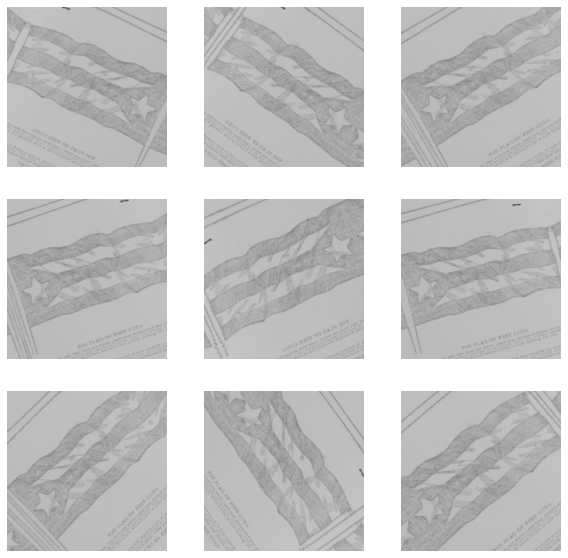

In [ ]:
photo_data.show_batch(unique=True, figsize=(10,10))

## Creating a Model

In [ ]:
learn = vision_learner(photo_data, densenet121, metrics=[F1ScoreMulti(), accuracy_multi])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
?learn

## Training the Model

SuggestedLRs(valley=0.0014454397605732083)

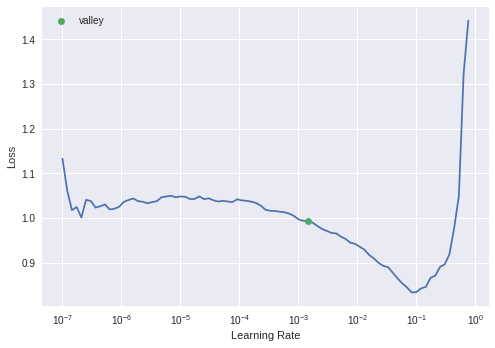

In [ ]:
learn.lr_find()

## Fitting the Model


In [ ]:
learn.fit_one_cycle(5, lr_max=2e-2)

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.678488,0.280234,0.532702,0.898750,02:16
1,0.497288,0.489797,0.427467,0.822917,02:08
2,0.403892,0.304587,0.397424,0.900000,02:08
3,0.338853,0.225936,0.518751,0.908333,02:09
4,0.284835,0.224359,0.519456,0.912083,02:07


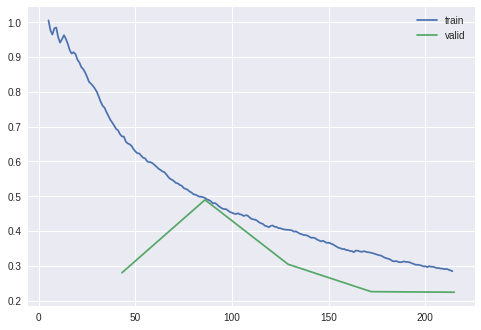

In [ ]:
learn.recorder.plot_loss()

### Saving Progress


In [ ]:
learn.save('stage_1')

Path('models/stage_1.pth')

## Unfreezing the Model



In [ ]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

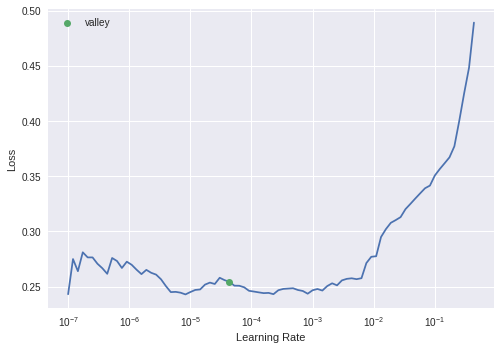

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(6e-6, 4e-4), cbs=[SaveModelCallback(monitor='f1_score')])

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.240202,0.218723,0.526381,0.915000,02:10
1,0.234050,0.215949,0.540583,0.915833,02:08
2,0.229068,0.214812,0.545768,0.918333,02:09
3,0.223033,0.214549,0.551987,0.919167,02:07


Better model found at epoch 0 with f1_score value: 0.526381421744325.
Better model found at epoch 1 with f1_score value: 0.5405827713765732.
Better model found at epoch 2 with f1_score value: 0.5457677217120557.
Better model found at epoch 3 with f1_score value: 0.5519872296565753.


## Investigating the Results of our Model


In [ ]:
y_pred, y_true = learn.get_preds()

In [ ]:
len(y_pred), len(y_true)

(600, 600)

In [ ]:
y_pred[0]

TensorBase([6.9503e-04, 9.9993e-01, 2.0776e-04, 1.0363e-04])

## Exploring our Predictions Using scikit-learn



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
f1_score(y_true, y_pred>0.50, average='macro')

0.5519872296565753

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred>0.50, target_names=photo_data.vocab, zero_division=1))

                 precision    recall  f1-score   support

         animal       1.00      0.00      0.00        22
          human       0.93      0.95      0.94       494
human-structure       0.66      0.60      0.63        89
      landscape       0.69      0.60      0.64        72

      micro avg       0.87      0.83      0.85       677
      macro avg       0.82      0.54      0.55       677
   weighted avg       0.87      0.83      0.84       677
    samples avg       0.90      0.89      0.86       677

